In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
path = r"C:\Users\dhrit\Downloads\test.csv"
df = pd.read_csv(path)
print("✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)
print("Columns:", list(df.columns))
print(df.head(), "\n")


✅ Dataset Loaded Successfully!
Shape: (2947, 563)
Columns: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mea

In [3]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X = pd.get_dummies(X, drop_first=True)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [5]:
if y.dtypes == 'object' or len(y.unique()) <= 20:
    problem_type = "classification"
else:
    problem_type = "regression"

print(f"🧩 Detected Problem Type: {problem_type.upper()}")

🧩 Detected Problem Type: CLASSIFICATION


In [6]:
if problem_type == "classification":
    model = xgb.XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
else:
    model = xgb.XGBRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )


In [ ]:
from sklearn.preprocessing import LabelEncoder

if problem_type == "classification":
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)
    y_test = le.transform(y_test)

model.fit(X_train, y_train)
print("🚀 Model Training Complete!\n")


🚀 Model Training Complete!



In [8]:
y_pred = model.predict(X_test)

🎯 Accuracy: 0.9864406779661017

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       0.98      0.97      0.97       152
           2       0.96      0.98      0.97       137
           3       0.98      1.00      0.99       154
           4       1.00      0.98      0.99       123
           5       0.99      0.99      0.99       149

    accuracy                           0.99       885
   macro avg       0.99      0.99      0.99       885
weighted avg       0.99      0.99      0.99       885



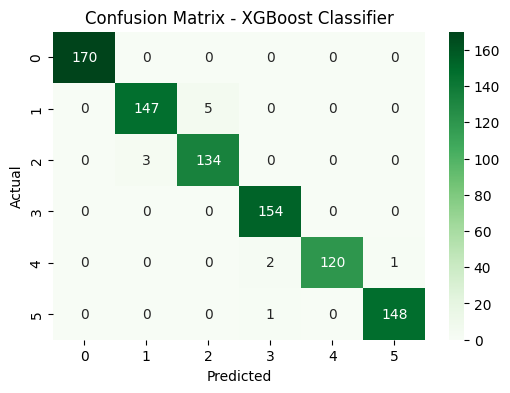

In [9]:
if problem_type == "classification":
    print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
    print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
    plt.title("Confusion Matrix - XGBoost Classifier")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

else:
    print("📈 R² Score:", r2_score(y_test, y_pred))
    print("📉 RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

    # Scatter Plot for Prediction vs Actual
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted (Regression)")
    plt.show()